In [2]:
#####################
# Library Loading
#####################
library(tidyverse)
library(ggplot2)
library(reshape2)
library(cowplot)
library(gplots)
library(tools)
library(scales)
library(stringr)
library(RColorBrewer)
library(ggsci)
library(pheatmap)
library(ComplexHeatmap)
library(ggcorrplot)
library(readxl)
library(GGally)
library(plot3D)
library(ggrepel)

In [3]:
#####################
# Config Theme
#####################
theme_set(theme_minimal())
options(repr.plot.width=10, repr.plot.height=10)

In [4]:
#####################
# Color Pallett
#####################
GroupID_Color_List = c("Naive"="#88008A", "CCR6neg"="#FFA500", "CCR6low"="#0456f8", "CCR6int"="#1D8F06", "CCR6high"="#e51134")
GroupID_Order_List = c("Naive", "CCR6neg", "CCR6low", "CCR6int", "CCR6high")
GroupID_Label_List = c("Naive"="Naive", "CCR6neg"=expression(paste("CCR6"^neg)), "CCR6low"=expression(paste("CCR6"^low)), "CCR6int"=expression(paste("CCR6"^int)), "CCR6high"=expression(paste("CCR6"^high)))

In [5]:
#####################
# Input/Output
#####################
PCA_file_Path = "../Data/Fluidigm_Donor123_PCA.xlsx"
gene_list_file_Path = "../Data/Fluidigm_Donor123_Gene_List.txt"
metadata_file_Path = "../Data/Fluidigm_Donor123_sample_design.txt"

In [6]:
#####################
# Read I/O
#####################
PCA_DF = read_excel(PCA_file_Path, sheet= "sample_scores")
#head(PCA_DF, n=5L)
#dim(PCA_DF)
gene_list_DF = read_tsv(gene_list_file_Path)
#head(gene_list_DF, n=5L)
#dim(gene_list_DF)
metadata_DF = read_tsv(metadata_file_Path)
#head(metadata_DF, n=5L)
#dim(metadata_DF)

Parsed with column specification:
cols(
  GeneID = col_character()
)
Parsed with column specification:
cols(
  SampleID = col_character(),
  GroupID = col_character()
)


In [7]:
####################
#Data Wrangling
####################
#1- calculate variance
PCA_variance = PCA_DF %>%  
    summarize_at(.vars = vars(contains("PC")), .funs = list(var)) %>% 
    gather(key = pc, value = variance) %>% 
    mutate(var_exp = variance/sum(variance), cum_var_exp = cumsum(var_exp), pc = str_replace(pc, ".fitted", ""))
#

PC1_percentage = round(PCA_variance$var_exp[1] * 100, 2)
PC1_title = paste("PC1 (",as.character(PC1_percentage), "%)", sep="")
PC2_percentage = round(PCA_variance$var_exp[2] * 100, 2)
PC2_title = paste( "PC2 (",as.character(PC2_percentage),"%)", sep="")

#2-Axis min/max
min_exp = min(PCA_DF$PC1, PCA_DF$PC2) - 0.1
max_exp = max(PCA_DF$PC1, PCA_DF$PC2) + 0.1



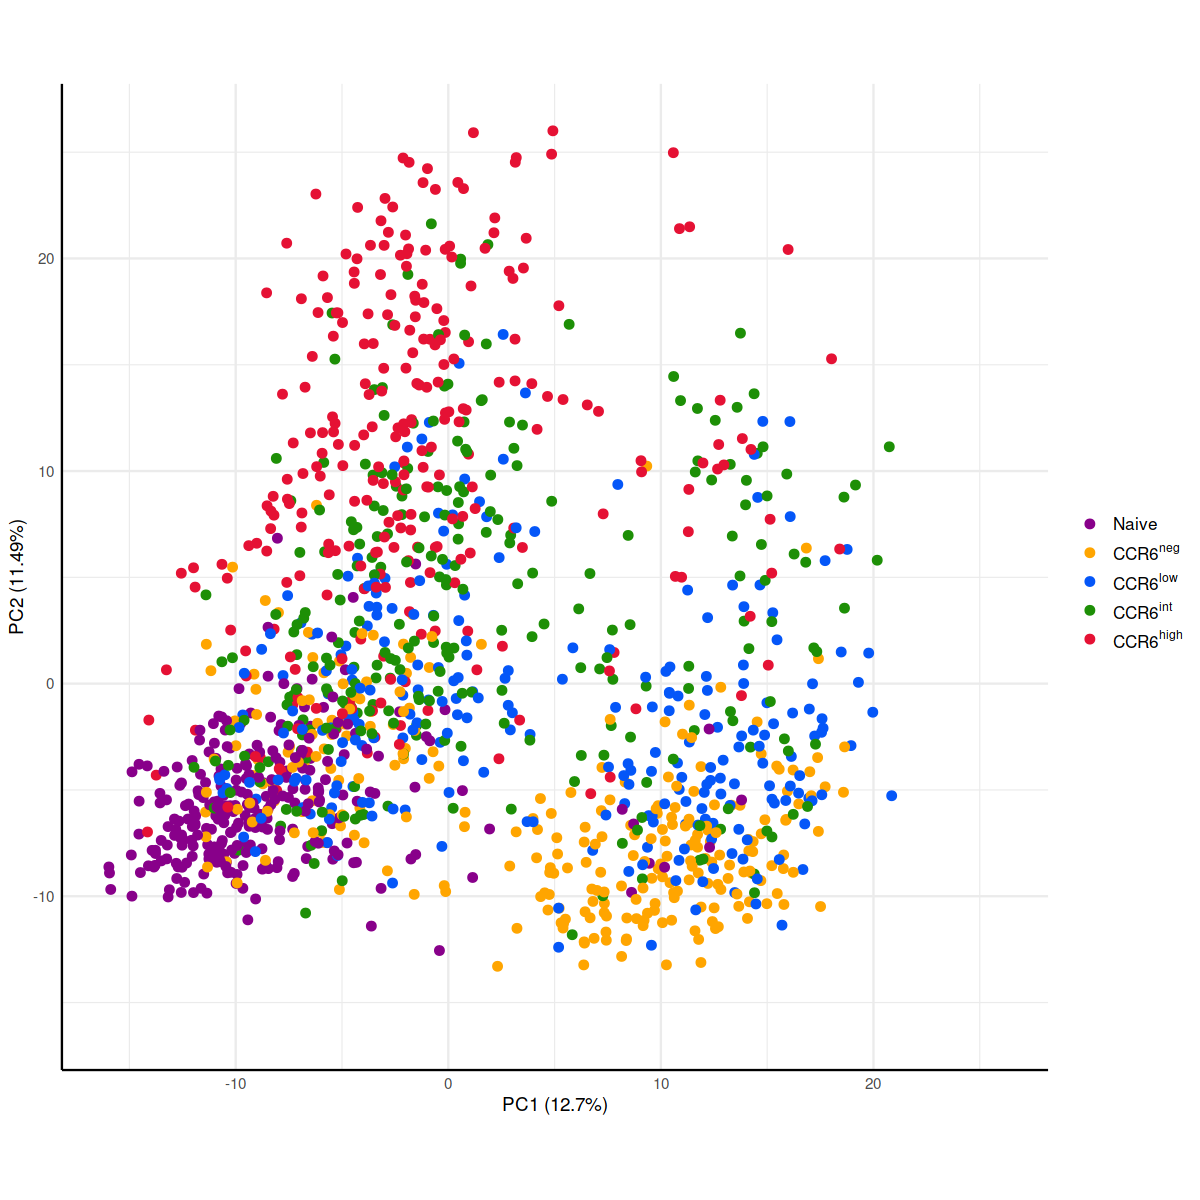

In [8]:
####################
# ScatterPlot
####################
PCA_ScatterPlot_Object = ggplot(PCA_DF, aes(x=PC1, y=PC2, color=GroupID)) +
    geom_point(size=2)  +
    xlim(min_exp, max_exp) +
    ylim(min_exp, max_exp) +
    labs(title = NULL, subtitle = NULL, caption = NULL, tag = NULL, x=PC1_title, y=PC2_title) +
    scale_color_manual(breaks = GroupID_Order_List, labels=GroupID_Label_List, values=GroupID_Color_List) +
    theme(
        ###LEGEND
        aspect.ratio=1,
        legend.position="right",
        legend.title = element_blank(),
        legend.key=element_blank(),
        legend.text.align = 0,
        legend.text = element_text(size=10,  family="sans", face="plain", color = "black", angle=0, vjust=0.5),
        legend.background = element_blank(),
        #legend.box.margin=LEGEND_BOX_MARGIN,
        #legend.margin=LEGEND_MARGIN,
        ###
        #plot.margin = SCATTER_MARGIN,
        axis.line = element_line(colour = "black")
    )
PCA_ScatterPlot_Object

In [9]:
ggsave(file="../Result/Fluidigm_Donor123_PCA_2D.pdf", device=cairo_pdf, plot=PCA_ScatterPlot_Object, width = 10, height = 10, units = "in", dpi=1200)

In [10]:
PCA_ScatterPlot_Object = plot_grid(PCA_ScatterPlot_Object, nrow=1)
save(PCA_ScatterPlot_Object, file="../Result/Fluidigm_Donor123_PCA_2D.Robj")